Przygotowanie bibliotek:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

Import danych:

In [2]:
os.getcwd()

path = r'C:\Users\PC\Desktop\SEMESTER 5\okulografia\analiza'
os.chdir(path)
plik = os.listdir()
plik[2]

df = pd.read_csv(plik[3])
df

,study_id,item_id,item_filename,item_cdn_url,tester_id,tester_external_id,tester_display_name,tester_tags,tester_quality_grade,tester_quality_grade_item,test_item_display_order,aoi_id,aoi_name,aoi_item_parts,aoi_size_percents,aoi_time_range_from_ms,aoi_time_range_to_ms,aoi_fixation_total_count,aoi_fixation_average_duration_ms,aoi_fixation_ttff_ms,aoi_fixation_average_total_time_spent_ms,aoi_fixation_first_fixation_average_duration_ms,notes
0,d155b055-9d26-4c3e-899b-2943ddae0867,a6cc7e22-511c-41a6-b4cb-bcdb3aa1531d,Adrianna Czarnecka.png,https://d48dl6cezsco5.cloudfront.net/experimen...,4c453528-0f26-4681-97e3-2a6bb075da55,NaN,"khj, Female, 24",NaN,5,5,3,b2bde8a6-2e06-46ae-921d-dca51e3d70aa,avatar,"[{""areaPoints"":{""topLeft"":{""xPx"":1,""yPx"":0},""b...",24.621212,500,40000,6,293.0,653.0,1755.0,127.0,RealEye v8.14.2; FixationFilterSettings [gazeP...
1,d155b055-9d26-4c3e-899b-2943ddae0867,a6cc7e22-511c-41a6-b4cb-bcdb3aa1531d,Adrianna Czarnecka.png,https://d48dl6cezsco5.cloudfront.net/experimen...,4c453528-0f26-4681-97e3-2a6bb075da55,NaN,"khj, Female, 24",NaN,5,5,3,bdb53d04-7c22-43c6-9997-81979a1f2ebd,doswiadczenie_zawodowe,"[{""areaPoints"":{""topLeft"":{""xPx"":842,""yPx"":0},...",24.587743,500,40000,28,514.0,14672.0,14401.0,167.0,NaN
2,d155b055-9d26-4c3e-899b-2943ddae0867,a6cc7e22-511c-41a6-b4cb-bcdb3aa1531d,Adrianna Czarnecka.png,https://d48dl6cezsco5.cloudfront.net/experimen...,4c453528-0f26-4681-97e3-2a6bb075da55,NaN,"khj, Female, 24",NaN,5,5,3,f76ce316-a2ec-421b-a9a6-b59f9f93ec84,wyksztalcenie,"[{""areaPoints"":{""topLeft"":{""xPx"":840,""yPx"":592...",24.982464,500,40000,23,421.0,8751.0,9682.0,372.0,NaN
3,d155b055-9d26-4c3e-899b-2943ddae0867,a6cc7e22-511c-41a6-b4cb-bcdb3aa1531d,Adrianna Czarnecka.png,https://d48dl6cezsco5.cloudfront.net/experimen...,4c453528-0f26-4681-97e3-2a6bb075da55,NaN,"khj, Female, 24",NaN,5,5,3,fb34f810-dddd-465a-b6fc-f9fa43ed5f0c,zainteresowania,"[{""areaPoints"":{""topLeft"":{""xPx"":0,""yPx"":586},...",25.294613,500,40000,16,459.0,2694.0,7350.0,600.0,NaN
4,d155b055-9d26-4c3e-899b-2943ddae0867,a6cc7e22-511c-41a6-b4cb-bcdb3aa1531d,Adrianna Czarnecka.png,https://d48dl6cezsco5.cloudfront.net/experimen...,be1eaac1-7d51-4601-b2d4-da48fb673ac9,NaN,"Anonymous, Male, 22",NaN,4,3,4,b2bde8a6-2e06-46ae-921d-dca51e3d70aa,avatar,"[{""areaPoints"":{""topLeft"":{""xPx"":1,""yPx"":0},""b...",24.621212,500,40000,3,296.0,1427.0,889.0,265.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,d155b055-9d26-4c3e-899b-2943ddae0867,5d398901-dad8-4ca9-bf97-819e678e7099,Agata Krupa.png,https://d48dl6cezsco5.cloudfront.net/experimen...,1005b1e2-4248-490b-945a-d7073971f4cf,NaN,"Marysia, Female, 21",NaN,5,5,6,c6b27662-5b6e-4793-adfb-068cb958fed3,zainteresowania,"[{""areaPoints"":{""topLeft"":{""xPx"":24,""yPx"":16},...",64.676227,500,60000,64,250.0,530.0,16024.0,244.0,NaN
636,d155b055-9d26-4c3e-899b-2943ddae0867,5d398901-dad8-4ca9-bf97-819e678e7099,Agata Krupa.png,https://d48dl6cezsco5.cloudfront.net/experimen...,d3d013b6-91c2-4573-a96f-b8463b66a4a0,NaN,"nnn, Female, 22",NaN,5,5,8,3460d11b-6fc0-4aba-9d52-0cfc437b8e3b,avatar,"[{""areaPoints"":{""topLeft"":{""xPx"":24,""yPx"":16},...",45.204225,500,60000,18,687.0,617.0,12372.0,184.0,NaN
637,d155b055-9d26-4c3e-899b-2943ddae0867,5d398901-dad8-4ca9-bf97-819e678e7099,Agata Krupa.png,https://d48dl6cezsco5.cloudfront.net/experimen...,d3d013b6-91c2-4573-a96f-b8463b66a4a0,NaN,"nnn, Female, 22",NaN,5,5,8,1431abf7-9b01-46ff-b2a6-3d08af3ab353,doswiadczenie_zawodowe,"[{""areaPoints"":{""topLeft"":{""xPx"":24,""yPx"":16},...",45.204225,500,60000,18,687.0,617.0,12372.0,184.0,NaN
638,d155b055-9d26-4c3e-899b-2943ddae0867,5d398901-dad8-4ca9-bf97-819e678e7099,Agata Krupa.png,https://d48dl6cezsco5.cloudfront.net/experimen...,d3d013b6-91c2-4573-a96f-b8463b66a4a0,NaN,"nnn, Female, 22",NaN,5,5,8,5658324c-d6d7-486a-8f9e-a01acf8d5cd2,wyksztalcenie,"[{""areaPoints"":{""topLeft"":{""xPx"":24,""yPx"":16},...",84.100228,500,60000,71,704.0,617.0,50000

Pierwsze analizy:
a) średni czas fiksacji dla każdego AOI z podziałem na grupy
b) liczba fiksacji dla każdego AOI z podziałem na grupy
c) jaki czas minął do pierwszej fiksacji dla każdego AOI z podziałem na grupy
d) czas trwania pierszej fiksacji z podziałem na grupu

Najpierw tworzymy grupy programistów:

In [3]:
df_programisci = df[(df['item_filename'] == "Adrianna Czarnecka.png") | (df['item_filename'] == "Aleks Szewczyk.png") | (df['item_filename'] == "Fabian Jankowski.png") | (df['item_filename'] == "Weronika Michalak.png")]
df_programisci.head()

,study_id,item_id,item_filename,item_cdn_url,tester_id,tester_external_id,tester_display_name,tester_tags,tester_quality_grade,tester_quality_grade_item,test_item_display_order,aoi_id,aoi_name,aoi_item_parts,aoi_size_percents,aoi_time_range_from_ms,aoi_time_range_to_ms,aoi_fixation_total_count,aoi_fixation_average_duration_ms,aoi_fixation_ttff_ms,aoi_fixation_average_total_time_spent_ms,aoi_fixation_first_fixation_average_duration_ms,notes
0,d155b055-9d26-4c3e-899b-2943ddae0867,a6cc7e22-511c-41a6-b4cb-bcdb3aa1531d,Adrianna Czarnecka.png,https://d48dl6cezsco5.cloudfront.net/experimen...,4c453528-0f26-4681-97e3-2a6bb075da55,NaN,"khj, Female, 24",NaN,5,5,3,b2bde8a6-2e06-46ae-921d-dca51e3d70aa,avatar,"[{""areaPoints"":{""topLeft"":{""xPx"":1,""yPx"":0},""b...",24.621212,500,40000,6,293.0,653.0,1755.0,127.0,RealEye v8.14.2; FixationFilterSettings [gazeP...
1,d155b055-9d26-4c3e-899b-2943ddae0867,a6cc7e22-511c-41a6-b4cb-bcdb3aa1531d,Adrianna Czarnecka.png,https://d48dl6cezsco5.cloudfront.net/experimen...,4c453528-0f26-4681-97e3-2a6bb075da55,NaN,"khj, Female, 24",NaN,5,5,3,bdb53d04-7c22-43c6-9997-81979a1f2ebd,doswiadczenie_zawodowe,"[{""areaPoints"":{""topLeft"":{""xPx"":842,""yPx"":0},...",24.587743,500,40000,28,514.0,14672.0,14401.0,167.0,NaN
2,d155b055-9d26-4c3e-899b-2943ddae0867,a6cc7e22-511c-41a6-b4cb-bcdb3aa1531d,Adrianna Czarnecka.png,https://d48dl6cezsco5.cloudfront.net/experimen...,4c453528-0f26-4681-97e3-2a6bb075da55,NaN,"khj, Female, 24",NaN,5,5,3,f76ce316-a2ec-421b-a9a6-b59f9f93ec84,wyksztalcenie,"[{""areaPoints"":{""topLeft"":{""xPx"":840,""yPx"":592...",24.982464,500,40000,23,421.0,8751.0,9682.0,372.0,NaN
3,d155b055-9d26-4c3e-899b-2943ddae0867,a6cc7e22-511c-41a6-b4cb-bcdb3aa1531d,Adrianna Czarnecka.png,https://d48dl6cezsco5.cloudfront.net/experimen...,4c453528-0f26-4681-97e3-2a6bb075da55,NaN,"khj, Female, 24",NaN,5,5,3,fb34f810-dddd-465a-b6fc-f9fa43ed5f0c,zainteresowania,"[{""areaPoints"":{""topLeft"":{""xPx"":0,""yPx"":586},...",25.294613,500,40000,16,459.0,2694.0,7350.0,600.0,NaN
4,d155b055-9d26-4c3e-899b-2943ddae0867,a6cc7e22-511c-41a6-b4cb-bcdb3aa1531d,Adrianna Czarnecka.png,https://d48dl6cezsco5.cloudfront.net/experimen...,be1eaac1-7d51-4601-b2d4-da48fb673ac9,NaN,"Anonymous, Male, 22",NaN,4,3,4,b2bde8a6-2e06-46ae-921d-dca51e3d70aa,avatar,"[{""areaPoints"":{""topLeft"":{""xPx"":1,""yPx"":0},""b...",24.621212,500,40000,3,296.0,1427.0,889.0,265.0,NaN


Wybieramy grupy recepcjonistów bez Agaty Krupy, ze względu na błąd techniczny:

In [4]:
df_recepcjonisci = df[(df['item_filename'] == "Ernest Kowalczyk.png") | (df['item_filename'] == "Ula Suchocka.png") | (df['item_filename'] == "Robert Malinowski.png")]
df_recepcjonisci.head()

,study_id,item_id,item_filename,item_cdn_url,tester_id,tester_external_id,tester_display_name,tester_tags,tester_quality_grade,tester_quality_grade_item,test_item_display_order,aoi_id,aoi_name,aoi_item_parts,aoi_size_percents,aoi_time_range_from_ms,aoi_time_range_to_ms,aoi_fixation_total_count,aoi_fixation_average_duration_ms,aoi_fixation_ttff_ms,aoi_fixation_average_total_time_spent_ms,aoi_fixation_first_fixation_average_duration_ms,notes
320,d155b055-9d26-4c3e-899b-2943ddae0867,db77090b-7b13-43e1-bea6-487586b34e80,Ernest Kowalczyk.png,https://d48dl6cezsco5.cloudfront.net/experimen...,be1eaac1-7d51-4601-b2d4-da48fb673ac9,NaN,"Anonymous, Male, 22",NaN,4,4,5,0227e8d9-66b7-48ba-a07b-6cc8a737d2a4,avatar,"[{""areaPoints"":{""topLeft"":{""xPx"":0,""yPx"":3},""b...",24.949896,500,40000,7,258.0,884.0,1803.0,179.0,RealEye v8.14.2; FixationFilterSettings [gazeP...
321,d155b055-9d26-4c3e-899b-2943ddae0867,db77090b-7b13-43e1-bea6-487586b34e80,Ernest Kowalczyk.png,https://d48dl6cezsco5.cloudfront.net/experimen...,be1eaac1-7d51-4601-b2d4-da48fb673ac9,NaN,"Anonymous, Male, 22",NaN,4,4,5,86000e71-1a43-4d3a-a4ed-fdc9ac4d40d8,doswiadczenie_zawodowe,"[{""areaPoints"":{""topLeft"":{""xPx"":841,""yPx"":0},...",24.856502,500,40000,32,350.0,12468.0,11199.0,100.0,NaN
322,d155b055-9d26-4c3e-899b-2943ddae0867,db77090b-7b13-43e1-bea6-487586b34e80,Ernest Kowalczyk.png,https://d48dl6cezsco5.cloudfront.net/experimen...,be1eaac1-7d51-4601-b2d4-da48fb673ac9,NaN,"Anonymous, Male, 22",NaN,4,4,5,1fddd2db-150f-485d-8842-d5ff0bcf8802,wyksztalcenie,"[{""areaPoints"":{""topLeft"":{""xPx"":0,""yPx"":622},...",47.670455,500,40000,35,407.0,609.0,14255.0,209.0,NaN
323,d155b055-9d26-4c3e-899b-2943ddae0867,db77090b-7b13-43e1-bea6-487586b34e80,Ernest Kowalczyk.png,https://d48dl6cezsco5.cloudfront.net/experimen...,be1eaac1-7d51-4601-b2d4-da48fb673ac9,NaN,"Anonymous, Male, 22",NaN,4,4,5,aa01964f-a5c2-47f1-82a3-0ac8be0506f3,zainteresowania,"[{""areaPoints"":{""topLeft"":{""xPx"":0,""yPx"":622},...",23.751152,500,40000,21,414.0,609.0,8686.0,209.0,NaN
324,d155b055-9d26-4c3e-899b-2943ddae0867,db77090b-7b13-43e1-bea6-487586b34e80,Ernest Kowalczyk.png,https://d48dl6cezsco5.cloudfront.net/experimen...,4c453528-0f26-4681-97e3-2a6bb075da55,NaN,"khj, Female, 24",NaN,5,5,2,0227e8d9-66b7-48ba-a07b-6cc8a737d2a4,avatar,"[{""areaPoints"":{""topLeft"":{""xPx"":0,""yPx"":3},""b...",24.949896,500,40000,8,422.0,531.0,3374.0,543.0,NaN


a) średni czas fiksacji dla każdego AOI, programiści:

In [5]:
lista_AOI = ["avatar", "doswiadczenie_zawodowe", "wyksztalcenie", "zainteresowania"]

print("Statystyki podstawowe dla programistów:  \n")
for i in lista_AOI:
    df_tymczasowe = df_programisci[df_programisci["aoi_name"] == i]
    wynik = df_tymczasowe["aoi_fixation_average_duration_ms"].mean(skipna = True)
    wynik_std = df_tymczasowe["aoi_fixation_average_duration_ms"].std(skipna = True)
    print(i, " ", wynik, " ", wynik_std)

Statystyki podstawowe dla programistów:  

avatar   333.0886075949367   105.84667065648307
doswiadczenie_zawodowe   381.0506329113924   161.0659921078837
wyksztalcenie   360.425   121.5295442606658
zainteresowania   397.8625   179.63456179460354


b) liczba fiksacji dla każdego AOI, programiści:

In [6]:
print("Statystyki podstawowe dla programistów:  \n")
for i in lista_AOI:
    df_tymczasowe = df_programisci[df_programisci["aoi_name"] == i]
    wynik = df_tymczasowe["aoi_fixation_total_count"].mean(skipna = True)
    wynik_std = df_tymczasowe["aoi_fixation_total_count"].std(skipna = True)
    print(i, " ", wynik, " ", wynik_std)

Statystyki podstawowe dla programistów:  

avatar   23.6875   23.912071920774743
doswiadczenie_zawodowe   28.5875   16.035319994991436
wyksztalcenie   42.175   22.13349648534245
zainteresowania   19.4   8.899722652484135


c) jaki czas minął do pierwszej fiksacji dla każdego AOI, programiści:

In [7]:
print("Statystyki podstawowe dla programistów:  \n")
for i in lista_AOI:
    df_tymczasowe = df_programisci[df_programisci["aoi_name"] == i]
    wynik = df_tymczasowe["aoi_fixation_ttff_ms"].mean(skipna = True)
    wynik_std = df_tymczasowe["aoi_fixation_ttff_ms"].std(skipna = True)
    print(i, " ", wynik, " ", wynik_std)

Statystyki podstawowe dla programistów:  

avatar   2053.5949367088606   3466.4089062912153
doswiadczenie_zawodowe   3956.0759493670885   5228.3924326751885
wyksztalcenie   4343.1   4796.6834204372335
zainteresowania   6761.575   6524.154616703855


d) czas trwania pierszej fiksacji, programiści:

In [8]:
print("Statystyki podstawowe dla programistów:  \n")
for i in lista_AOI:
    df_tymczasowe = df_programisci[df_programisci["aoi_name"] == i]
    wynik = df_tymczasowe["aoi_fixation_first_fixation_average_duration_ms"].mean(skipna = True)
    wynik_std = df_tymczasowe["aoi_fixation_first_fixation_average_duration_ms"].std(skipna = True)
    print(i, " ", wynik, " ", wynik_std)

Statystyki podstawowe dla programistów:  

avatar   273.30379746835445   208.1486989698236
doswiadczenie_zawodowe   335.32911392405066   296.157257322169
wyksztalcenie   248.925   165.8306809477358
zainteresowania   318.8375   264.43134323451545


a) średni czas fiksacji dla każdego AOI, recepcjoniści:

In [9]:
print("Statystyki podstawowe dla recepcjonistów:  \n")
for i in lista_AOI:
    df_tymczasowe = df_recepcjonisci[df_recepcjonisci["aoi_name"] == i]
    wynik = df_tymczasowe["aoi_fixation_average_duration_ms"].mean(skipna = True)
    wynik_std = df_tymczasowe["aoi_fixation_average_duration_ms"].std(skipna = True)
    print(i, " ", wynik, " ", wynik_std)

Statystyki podstawowe dla recepcjonistów:  

avatar   291.6   98.05052312326417
doswiadczenie_zawodowe   360.81666666666666   120.20173603002898
wyksztalcenie   374.28333333333336   143.60280574977998
zainteresowania   391.7   181.9398578223221


b) liczba fiksacji dla każdego AOI, recepcjoniści:

In [10]:
print("Statystyki podstawowe dla recepcjonistów:  \n")
for i in lista_AOI:
    df_tymczasowe = df_recepcjonisci[df_recepcjonisci["aoi_name"] == i]
    wynik = df_tymczasowe["aoi_fixation_total_count"].mean(skipna = True)
    wynik_std = df_tymczasowe["aoi_fixation_total_count"].std(skipna = True)
    print(i, " ", wynik, " ", wynik_std)

Statystyki podstawowe dla recepcjonistów:  

avatar   14.333333333333334   10.90119985102972
doswiadczenie_zawodowe   35.166666666666664   16.021348751562993
wyksztalcenie   67.66666666666667   25.205371143136873
zainteresowania   45.983333333333334   24.375933996302386


c) jaki czas minął do pierwszej fiksacji dla każdego AOI, recepcjoniści:

In [11]:
print("Statystyki podstawowe dla recepcjonistów:  \n")
for i in lista_AOI:
    df_tymczasowe = df_recepcjonisci[df_recepcjonisci["aoi_name"] == i]
    wynik = df_tymczasowe["aoi_fixation_ttff_ms"].mean(skipna = True)
    wynik_std = df_tymczasowe["aoi_fixation_ttff_ms"].std(skipna = True)
    print(i, " ", wynik, " ", wynik_std)

Statystyki podstawowe dla recepcjonistów:  

avatar   1917.1166666666666   4808.037772672583
doswiadczenie_zawodowe   2398.0333333333333   3246.4774963740742
wyksztalcenie   1749.1666666666667   2430.074694859989
zainteresowania   2640.0666666666666   4676.170481105408


d) czas trwania pierszej fiksacji, recepcjoniści:

In [12]:
print("Statystyki podstawowe dla recepcjonistów:  \n")
for i in lista_AOI:
    df_tymczasowe = df_recepcjonisci[df_recepcjonisci["aoi_name"] == i]
    wynik = df_tymczasowe["aoi_fixation_first_fixation_average_duration_ms"].mean(skipna = True)
    wynik_std = df_tymczasowe["aoi_fixation_first_fixation_average_duration_ms"].std(skipna = True)
    print(i, " ", wynik, " ", wynik_std)

Statystyki podstawowe dla recepcjonistów:  

avatar   263.8   151.6083044100873
doswiadczenie_zawodowe   306.1   256.6022907014284
wyksztalcenie   334.95   404.69697493979834
zainteresowania   320.8   247.701214218711


PLOTY ZE STATYSTYK PODSTAWOWYCH:

1) Plot średni czas fiksacji dla każdego AOI, programiści vs recepcjoniści:

In [13]:
dic_Series1= {}

for i in lista_AOI:
    df_roboczy = df_programisci[df_programisci["aoi_name"] == i]
    series = df_roboczy['aoi_fixation_average_duration_ms'].dropna()  #WYRZUCIĆ NAN!!!!!!
    dic_Series1[i] = list(series)
    
dic_Series2= {}

for i in lista_AOI:
    df_roboczy = df_recepcjonisci[df_recepcjonisci["aoi_name"] == i]
    series = df_roboczy['aoi_fixation_average_duration_ms'].dropna()  #WYRZUCIĆ NAN!!!!!!
    dic_Series2[i] = list(series)



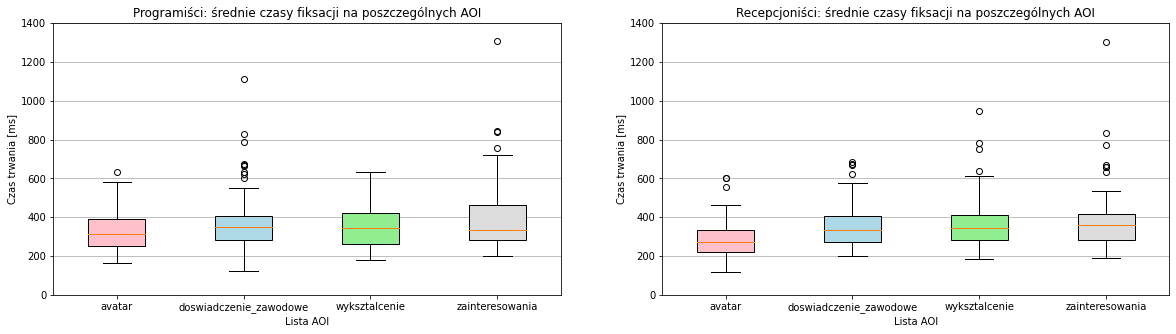

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# rectangular box plot
bplot1 = ax1.boxplot(dic_Series1.values(),
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels = dic_Series2.keys())  # will be used to label x-ticks
ax1.set_title('Programiści: średnie czasy fiksacji na poszczególnych AOI')
ax1.set(ylim=(0, 1400))

# notch shape box plot
bplot2 = ax2.boxplot(dic_Series2.values(),
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels = dic_Series2.keys())  # will be used to label x-ticks
ax2.set_title('Recepcjoniści: średnie czasy fiksacji na poszczególnych AOI')
ax2.set(ylim=(0, 1400))

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen', 'gainsboro']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Lista AOI')
    ax.set_ylabel('Czas trwania [ms]')

plt.show()

2) Plot liczba fiksacji dla każdego AOI, programiści vs recepcjoniści:

In [15]:
dic_Series1= {}

for i in lista_AOI:
    df_roboczy = df_programisci[df_programisci["aoi_name"] == i]
    series = df_roboczy['aoi_fixation_total_count'].dropna()  #WYRZUCIĆ NAN!!!!!!
    dic_Series1[i] = list(series)
    
dic_Series2= {}

for i in lista_AOI:
    df_roboczy = df_recepcjonisci[df_recepcjonisci["aoi_name"] == i]
    series = df_roboczy['aoi_fixation_total_count'].dropna()  #WYRZUCIĆ NAN!!!!!!
    dic_Series2[i] = list(series)

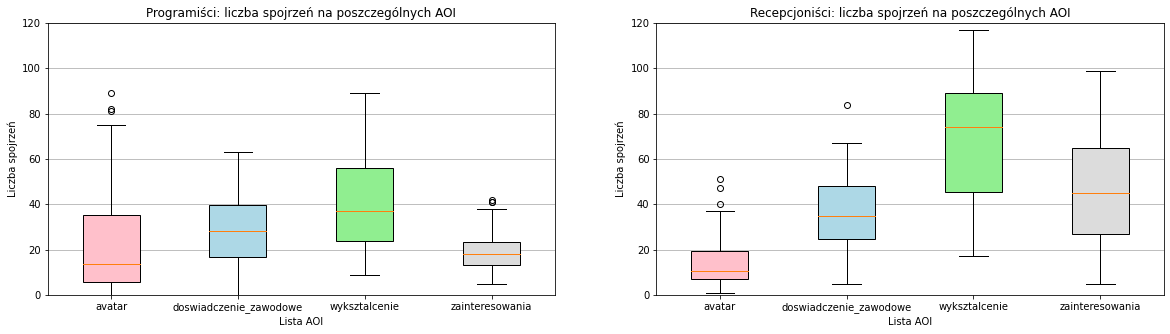

In [16]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# rectangular box plot
bplot1 = ax1.boxplot(dic_Series1.values(),
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels = dic_Series2.keys())  # will be used to label x-ticks
ax1.set_title('Programiści: liczba spojrzeń na poszczególnych AOI')
ax1.set(ylim=(0, 120))


# notch shape box plot
bplot2 = ax2.boxplot(dic_Series2.values(),
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels = dic_Series2.keys())  # will be used to label x-ticks
ax2.set_title('Recepcjoniści: liczba spojrzeń na poszczególnych AOI')
ax2.set(ylim=(0, 120))

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen', 'gainsboro']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Lista AOI')
    ax.set_ylabel('Liczba spojrzeń')

plt.show()

3) Plot jaki czas minął do pierwszej fiksacji dla każdego AOI, programiści vs recepcjoniści:

In [17]:
dic_Series1= {}

for i in lista_AOI:
    df_roboczy = df_programisci[df_programisci["aoi_name"] == i]
    series = df_roboczy['aoi_fixation_ttff_ms'].dropna()  #WYRZUCIĆ NAN!!!!!!
    dic_Series1[i] = list(series)
    
dic_Series2= {}

for i in lista_AOI:
    df_roboczy = df_recepcjonisci[df_recepcjonisci["aoi_name"] == i]
    series = df_roboczy['aoi_fixation_ttff_ms'].dropna()  #WYRZUCIĆ NAN!!!!!!
    dic_Series2[i] = list(series)

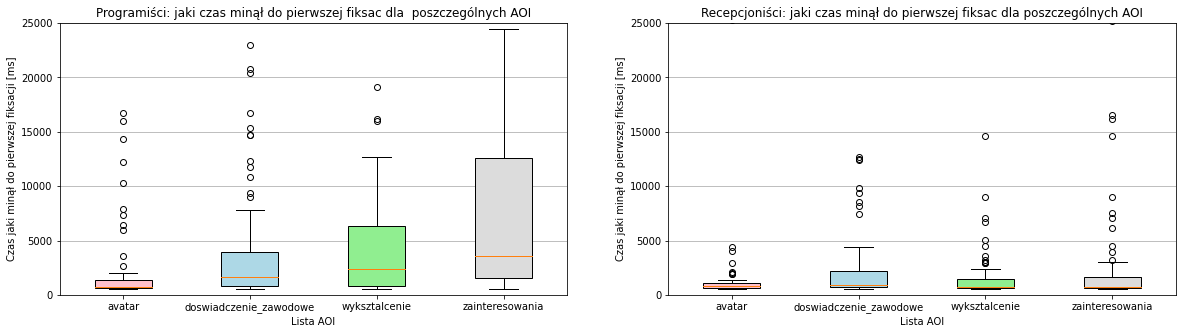

In [18]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# rectangular box plot
bplot1 = ax1.boxplot(dic_Series1.values(),
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels = dic_Series2.keys())  # will be used to label x-ticks
ax1.set_title('Programiści: jaki czas minął do pierwszej fiksac dla  poszczególnych AOI')
ax1.set(ylim=(0, 25000))

# notch shape box plot
bplot2 = ax2.boxplot(dic_Series2.values(),
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels = dic_Series2.keys())  # will be used to label x-ticks
ax2.set_title('Recepcjoniści: jaki czas minął do pierwszej fiksac dla poszczególnych AOI')
ax2.set(ylim=(0, 25000))

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen', 'gainsboro']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Lista AOI')
    ax.set_ylabel('Czas jaki minął do pierwszej fiksacji [ms]')

plt.show()

4) Plot jaki czas trwania pierszej fiksacji dla każdego AOI, programiści vs recepcjoniści:

In [19]:
dic_Series1= {}

for i in lista_AOI:
    df_roboczy = df_programisci[df_programisci["aoi_name"] == i]
    series = df_roboczy['aoi_fixation_first_fixation_average_duration_ms'].dropna()  #WYRZUCIĆ NAN!!!!!!
    dic_Series1[i] = list(series)
    
dic_Series2= {}

for i in lista_AOI:
    df_roboczy = df_recepcjonisci[df_recepcjonisci["aoi_name"] == i]
    series = df_roboczy['aoi_fixation_first_fixation_average_duration_ms'].dropna()  #WYRZUCIĆ NAN!!!!!!
    dic_Series2[i] = list(series)

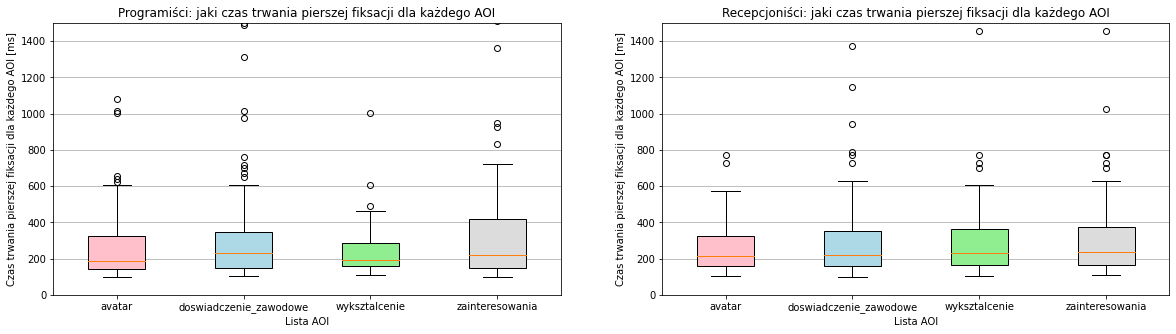

In [20]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# rectangular box plot
bplot1 = ax1.boxplot(dic_Series1.values(),
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels = dic_Series2.keys())  # will be used to label x-ticks
ax1.set_title('Programiści: jaki czas trwania pierszej fiksacji dla każdego AOI')
ax1.set(ylim=(0, 1500))

# notch shape box plot
bplot2 = ax2.boxplot(dic_Series2.values(),
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels = dic_Series2.keys())  # will be used to label x-ticks
ax2.set_title('Recepcjoniści: jaki czas trwania pierszej fiksacji dla każdego AOI')
ax2.set(ylim=(0, 1500))

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen', 'gainsboro']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Lista AOI')
    ax.set_ylabel('Czas trwania pierszej fiksacji dla każdego AOI [ms]')

plt.show()

HIPOTEZY:
H1: W zależności od wymagań wiążących się z pracą na danym stanowisku rekruterzy zwracają uwagę na inne aspekty życiorysu. 
H2: Podczas rekrutacji na stanowisko programisty/ki, rekruterzy najdłużej skupiają uwagę na obszarach wykształcenia oraz doświadczenia. 
H3: Podczas rekrutacji na stanowisko recepcjonisty/ki, rekruterzy najdłużej skupiają uwagę na obszarach kompetencji miękkich, zainteresowań oraz zdjęciu.

In [21]:
import scipy.stats as sp
from scipy import stats

1) Hipoteza H2:

In [22]:
p_values = np.zeros(shape=(4,4))

count = 0
for i in lista_AOI:    
    lista_pomocnicza = []
    for j in lista_AOI:
        df_test1 = df_programisci[df_programisci["aoi_name"] == i]
        series_test1 = df_test1['aoi_fixation_average_duration_ms'].dropna()
        df_test2= df_programisci[df_programisci["aoi_name"] == j]
        series_test2 = df_test2['aoi_fixation_average_duration_ms'].dropna()
        lista_pomocnicza.append(round(stats.ttest_ind(series_test1, series_test2).pvalue, 4))
    p_values[count] = lista_pomocnicza
    count = count + 1




In [23]:
p_values

array([[1.    , 0.0284, 0.2082, 0.0064],
       [0.0284, 1.    , 0.4772, 0.5355],
       [0.2082, 0.4772, 1.    , 0.2372],
       [0.0064, 0.5355, 0.2372, 1.    ]])

0 0 1.0
0 1 0.0284
0 2 0.2082
0 3 0.0064
1 0 0.0284
1 1 1.0
1 2 0.4772
1 3 0.5355
2 0 0.2082
2 1 0.4772
2 2 1.0
2 3 0.2372
3 0 0.0064
3 1 0.5355
3 2 0.2372
3 3 1.0


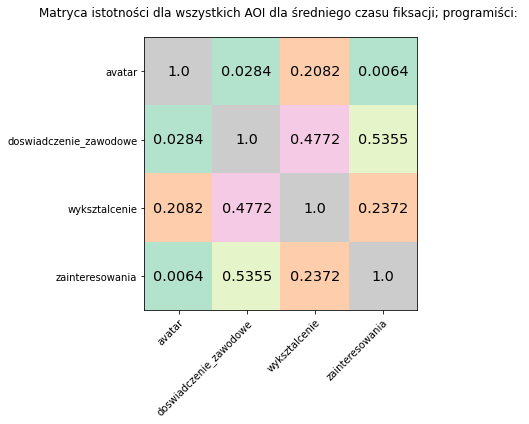

In [24]:
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(p_values, cmap = "Pastel2")

ax.set_xticks(np.arange(len(lista_AOI)), labels=lista_AOI)
ax.set_yticks(np.arange(len(lista_AOI)), labels=lista_AOI)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(lista_AOI)):
    for j in range(len(lista_AOI)):
        print(i, j, p_values[i][j])
        text = ax.text(j, i, p_values[i, j],
                       ha="center", va="center", color="black", size = 'x-large')

ax.set_title('Matryca istotności dla wszystkich AOI dla średniego czasu fiksacji; programiści: \n')
fig.tight_layout()
plt.show()

WNIOSKI:
Jeśli chodzi o CV wybierane na stanowisko programisty, to czas patrzenia był isotanie dłuższy dla zainteresowań niż dla avatara oraz był istotnie dłuższy dla doświadczenia zawodowego niż dla avatara, więc tylko częściwo udało wykazać się hipoteze 2.

2) Hipoteza H3:

In [25]:
p_values = np.zeros(shape=(4,4))

count = 0
for i in lista_AOI:    
    lista_pomocnicza = []
    for j in lista_AOI:
        df_test1 = df_recepcjonisci[df_recepcjonisci["aoi_name"] == i]
        series_test1 = df_test1['aoi_fixation_average_duration_ms'].dropna()
        df_test2= df_recepcjonisci[df_recepcjonisci["aoi_name"] == j]
        series_test2 = df_test2['aoi_fixation_average_duration_ms'].dropna()
        lista_pomocnicza.append(round(stats.ttest_ind(series_test1, series_test2).pvalue, 4))
    p_values[count] = lista_pomocnicza
    count = count + 1

p_values

array([[1.000e+00, 8.000e-04, 3.000e-04, 3.000e-04],
       [8.000e-04, 1.000e+00, 5.786e-01, 2.749e-01],
       [3.000e-04, 5.786e-01, 1.000e+00, 5.616e-01],
       [3.000e-04, 2.749e-01, 5.616e-01, 1.000e+00]])

0 0 1.0
0 1 0.0008
0 2 0.0003
0 3 0.0003
1 0 0.0008
1 1 1.0
1 2 0.5786
1 3 0.2749
2 0 0.0003
2 1 0.5786
2 2 1.0
2 3 0.5616
3 0 0.0003
3 1 0.2749
3 2 0.5616
3 3 1.0


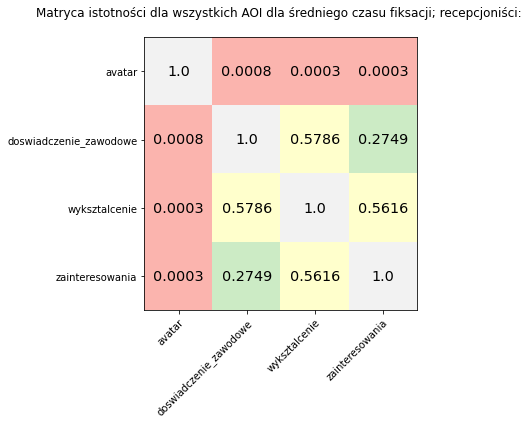

In [26]:
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(p_values, cmap = "Pastel1")

ax.set_xticks(np.arange(len(lista_AOI)), labels=lista_AOI)
ax.set_yticks(np.arange(len(lista_AOI)), labels=lista_AOI)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(lista_AOI)):
    for j in range(len(lista_AOI)):
        print(i, j, p_values[i][j])
        text = ax.text(j, i, p_values[i, j],
                       ha="center", va="center", color="black", size = 'x-large')

ax.set_title('Matryca istotności dla wszystkich AOI dla średniego czasu fiksacji; recepcjoniści: \n')
fig.tight_layout()
plt.show()

WNIOSKI: Jeśli chodzi o CV wybierane na stanowisko recepcjonisty, to czas patrzenia był isotanie dłuższy dla zainteresowań niż dla avatara, był istotnie dłuższy dla doświadczenia zawodowego niż dla avatara oraz był istotnie dłuższy dla wykształcenia niż dla avatara, więc nie udało się wykazać hipotezy 3, przy czym ujawnia nam się inny efekt, niż pierwotnie założyliśmy.

3) H1:
aby sprawdzić słuszność hipotezy 1, czyli hipotezy o ogólnych różnicach międzygrupowych, przeprowadzę analizy statystyczne dla par AOI z dwóch grup badawczych, w zależnosci od długości pierwszej fiksacji oraz czasu kiedy ona nastąpiła

In [27]:
lista_column = ["aoi_fixation_average_duration_ms", "aoi_fixation_total_count", "aoi_fixation_ttff_ms", "aoi_fixation_first_fixation_average_duration_ms"]

p_values_h1 = np.zeros(shape=(4,4))

count = 0
for i in lista_AOI:    
    lista_pomocnicza = []
    for j in lista_column:
        df_test1 = df_programisci[df_programisci["aoi_name"] == i]
        series_test1 = df_test1[j].dropna()
        df_test2= df_recepcjonisci[df_recepcjonisci["aoi_name"] == i]
        series_test2 = df_test2[j].dropna()
        lista_pomocnicza.append(round(stats.ttest_ind(series_test1, series_test2).pvalue, 4))
    p_values_h1[count] = lista_pomocnicza
    count = count + 1

In [28]:
p_values_h1

array([[1.960e-02, 5.600e-03, 8.461e-01, 7.658e-01],
       [4.162e-01, 1.760e-02, 4.440e-02, 5.429e-01],
       [6.168e-01, 0.000e+00, 6.000e-04, 2.059e-01],
       [8.420e-01, 0.000e+00, 1.000e-04, 9.645e-01]])

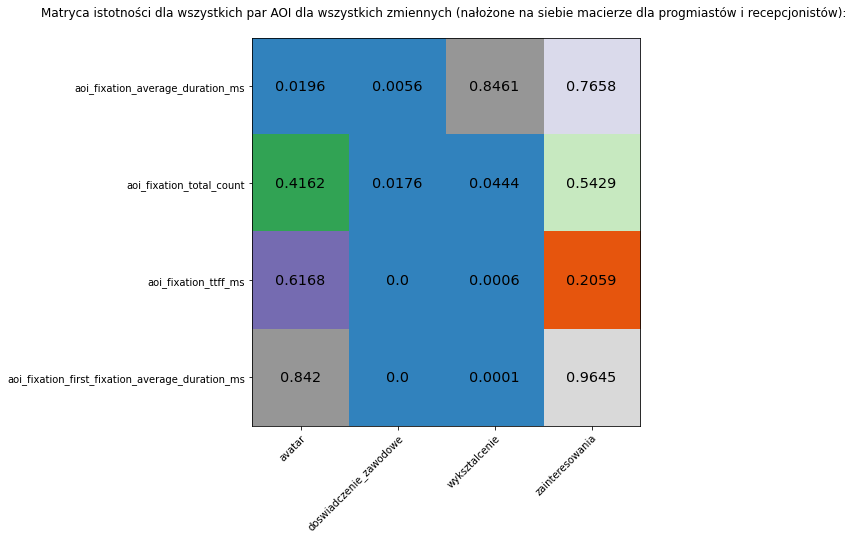

In [29]:
fig1, ax1 = plt.subplots(figsize = (9,9))
im = ax1.imshow(p_values_h1, cmap = "tab20c")




ax1.set_xticks(np.arange(len(lista_AOI)), labels = lista_AOI)
ax1.set_yticks(np.arange(len(lista_column)), labels=lista_column)

plt.setp(ax1.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(lista_AOI)):
    for j in range(len(lista_column)):
        text = ax1.text(j, i, p_values_h1[i, j],
                       ha="center", va="center", color="black", size = 'x-large')

ax1.set_title("Matryca istotności dla wszystkich par AOI dla wszystkich zmiennych (nałożone na siebie macierze dla progmiastów i recepcjonistów): \n")
fig1.tight_layout()
plt.show()

WNIOSKI: Jeśli chodzi o porównania międzygrupowe (programiści vs. recepcjoniści), to udało nam się znaleźć wiele statystycznie istotnych zależności:
    - zwracanie uwagi na doświadczenie zawodowe istotnie różniło się we wszystkich wskaźnikach zainteresowania 
    - zwracanie uwagi na wykształcenie istotnie statystycznie tóżniło się dla ilości spojrzeń, czasu i długości pierwszej fiksacji
    - zwracanie uwagi na avatar było istotnie różnie jedyne przy średnim czasie trwania fiksacji między grupami (na rzecz progrtamistów)
Tymsamym udało nam się potwierdzić hipoteze mówiącą o kierowaniu się rożnymi kryteriami rpzy wyborze osoby na odpowiednie stanowisko.